In [1]:
import pandas as pd
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('./wine-reviews/winemag-data-130k-v2.csv', index_col=0)

In [4]:
data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [5]:
len(data)

129971

In [16]:
data.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [6]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [15]:
data.groupby('country').describe()

points                                          \
                          count       mean       std   min    25%   50%   
country                                                                   
Argentina                3800.0  86.710263  3.179627  80.0  84.00  87.0   
Armenia                     2.0  87.500000  0.707107  87.0  87.25  87.5   
Australia                2329.0  88.580507  2.989900  80.0  87.00  89.0   
Austria                  3345.0  90.101345  2.499799  82.0  88.00  90.0   
Bosnia and Herzegovina      2.0  86.500000  2.121320  85.0  85.75  86.5   
Brazil                     52.0  84.673077  2.340782  80.0  83.00  85.0   
Bulgaria                  141.0  87.936170  2.077817  80.0  87.00  89.0   
Canada                    257.0  89.369650  2.384752  82.0  88.00  90.0   
Chile                    4472.0  86.493515  2.692959  80.0  85.00  86.0   
China                       1.0  89.000000       NaN  89.0  89.00  89.0   
Croatia                    73.0  87.219178  2.399344  81.0  86.00  88.0   
Cyprus                     11.0  87.181818  1.601136  85.0  86.00  87.0   
Czech Republic             12.0  87.250000  1.712255  84.0  86.50  88.0   
Egypt                       1.0  84.000000       NaN  84.0  84.00  84.0   
England                    74.0  91.581081  1.843216  89.0  90.00  91.0   
France                  22093.0  88.845109  3.044423  80.0  87.00  89.0   
Georgia                    86.0  87.686047  2.087845  82.0  87.00  88.0   
Germany                  2165.0  89.851732  2.469351  81.0  88.00  90.0   
Greece                    466.0  87.283262  2.185293  82.0  86.00  87.0   
Hungary                   146.0  89.191781  2.686659  81.0  88.00  89.0   
India                       9.0  90.222222  1.715938  87.0  90.00  90.0   
Israel                    505.0  88.471287  2.478412  80.0  87.00  89.0   
Italy                   19540.0  88.562231  2.649756  80.0  87.00  88.0   
Lebanon                    35.0  87.685714  2.784109  82.0  86.50  88.0   
Luxembourg                  6.0  88.666667  0.816497  88.0  88.00  88.5   
Macedonia                  12.0  86.833333  1.749459  84.0  85.75  87.0   
Mexico                     70.0  85.257143  2.722348  80.0  83.00  85.0   
Moldova                    59.0  87.203390  2.419601  82.0  86.00  88.0   
Morocco                    28.0  88.571429  1.687175  85.0  88.00  88.5   
New Zealand              1419.0  88.303030  2.435008  80.0  87.00  88.0   
Peru                       16.0  83.562500  1.860779  80.0  82.00  84.0   
Portugal                 5691.0  88.250220  2.996122  80.0  86.00  88.0   
Romania                   120.0  86.400000  1.716945  82.0  85.00  86.0   
Serbia                     12.0  87.500000  1.314257  86.0  86.00  87.5   
Slovakia                    1.0  87.000000       NaN  87.0  87.00  87.0   
Slovenia                   87.0  88.068966  1.730661  82.0  87.00  88.0   
South Africa             1401.0  88.056388  2.435826  82.0  86.00  88.0   
Spain                    6645.0  87.288337  3.066284  80.0  85.00  87.0   
Switzerland                 7.0  88.571429  2.507133  83.0  89.00  89.0   
Turkey                     90.0  88.088889  1.975379  84.0  87.00  88.0   
US                      54504.0  88.563720  3.114840  80.0  86.00  88.0   
Ukraine                    14.0  84.071429  1.591530  82.0  83.00  84.0   
Uruguay                   109.0  86.752294  2.687957  80.0  85.00  87.0   

                                        price                              \
                          75%    max    count       mean        std   min   
country                                                                     
Argentina               89.00   97.0   3756.0  24.510117  23.430122   4.0   
Armenia                 87.75   88.0      2.0  14.500000   0.707107  14.0   
Australia               91.00  100.0   2294.0  35.437663  49.049458   5.0   
Austria                 92.00   98.0   2799.0  30.762772  27.224797   7.0   
Bosnia and Herzegovina  87.25   88.

In [20]:
data.nunique()

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [21]:
data_drop = data.dropna()

In [23]:
data_drop.shape

(22387, 13)

In [24]:
data.shape

(129971, 13)

In [25]:
data.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [26]:
data_drop.country.unique()

array(['US'], dtype=object)

In [42]:
data_clean = data.dropna(subset=['points','price'])
data_cut = data_clean['price'][data_clean['price']<150]

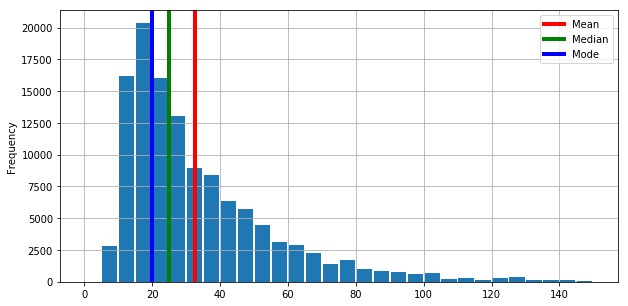

In [57]:
ax = data_cut.plot.hist(grid=True, rwidth=.9, figsize = (10, 5),bins=np.arange(0,155,5))
ax.axvline(data_cut.mean(), color='r', lw=4.)
ax.axvline(data_cut.median(), color='g', lw=4.)
ax.axvline(data_cut.mode()[0], color='b', lw=4.)
ax.legend(['Mean','Median','Mode'])

In [71]:
data_taglio = data_clean[data_clean['price']<155]

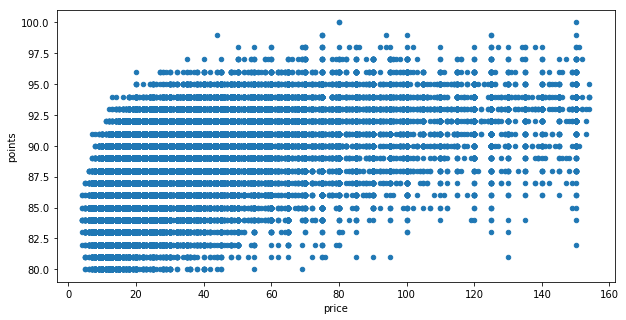

In [72]:
data_taglio.plot.scatter('price','points',figsize=(10,5))

In [73]:
data_taglio.describe()

,points,price
count,119758.000000,119758.000000
mean,88.367725,32.775255
std,2.999865,22.849421
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,41.000000
max,100.000000,154.000000


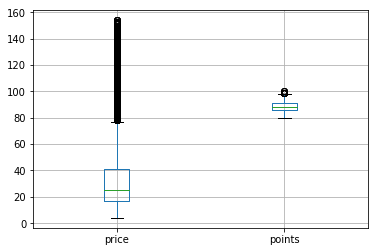

In [69]:
oxplot = data_taglio.boxplot(column=['price','points'])

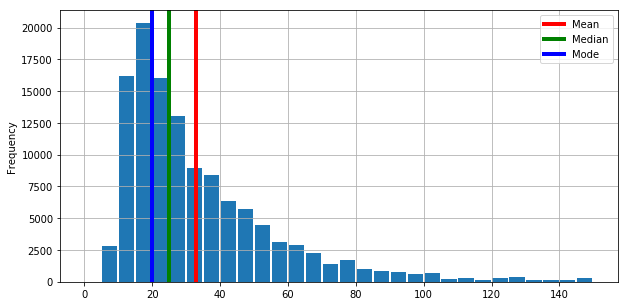

In [75]:
ax = data_taglio['price'].plot.hist(grid=True, rwidth=.9, figsize = (10, 5),bins=np.arange(0,155,5))
ax.axvline(data_taglio.price.mean(), color='r', lw=4.)
ax.axvline(data_taglio.price.median(), color='g', lw=4.)
ax.axvline(data_taglio.price.mode()[0], color='b', lw=4.)
ax.legend(['Mean','Median','Mode'])

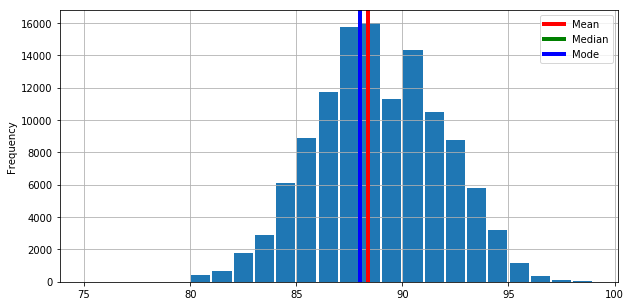

In [78]:
ax = data_taglio['points'].plot.hist(grid=True, rwidth=.9, figsize = (10, 5),bins=np.arange(75,100,1))
ax.axvline(data_taglio.points.mean(), color='r', lw=4.)
ax.axvline(data_taglio.points.median(), color='g', lw=4.)
ax.axvline(data_taglio.points.mode()[0], color='b', lw=4.)
ax.legend(['Mean','Median','Mode'])

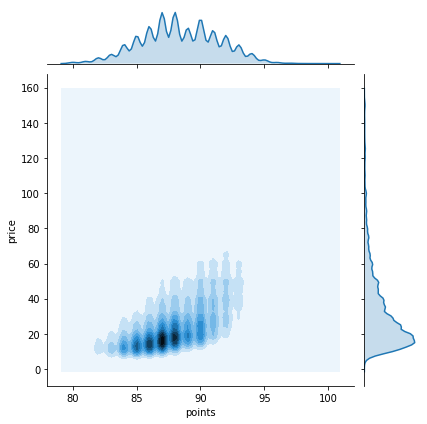

In [79]:
import seaborn as sns
sns.jointplot("points", "price", data_taglio, kind='kde');

In [81]:
data_taglio['priceLog'] = np.log(data_taglio['price'])

C:\Users\U413635\AppData\Local\Continuum\anaconda3\envs\moxoff\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


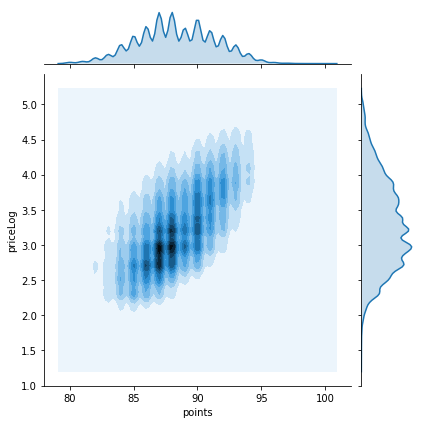

In [82]:
sns.jointplot("points", "priceLog", data_taglio, kind='kde');

In [85]:
X = data_taglio.priceLog
y = data_taglio.points

In [86]:
X = sm.add_constant(X)

In [87]:
model = sm.OLS(y,X).fit()

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                 6.678e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:35:15   Log-Likelihood:            -2.7495e+05
No. Observations:              119758   AIC:                         5.499e+05
Df Residuals:                  119756   BIC:                         5.499e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.7748      0.038   2085.860      0.000      78.701      78.849
priceLog       2.9139      0.011    258.417      0.000       2.892       2.936
==============================================================================
Omnibus:                     2375.963   Durbin-Watson:                   0.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2523.589
Skew:                          -0.347   Prob(JB):                         0.00
Kurtosis:                       3.151   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
count = data_taglio.groupby('country')['description'].count().nlargest(5)

In [124]:
first_five_sample = data_taglio.groupby('country')['description'].apply(len).sort_values(ascending=False).iloc[:5]

In [127]:
first_five_sample = (data_taglio.country.value_counts().head())

In [128]:
first_five_sample

US          53980
France      17317
Italy       16687
Spain        6500
Portugal     4839
Name: country, dtype: int64

In [129]:
data_subset = data[data.country.isin(first_five_sample.index)].copy()

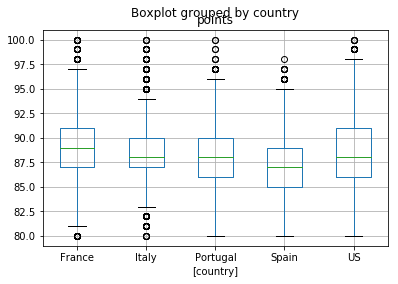

In [132]:
data_subset.boxplot(column=['points'],by=['country'])